In [2]:
# install and import libraries
!pip install textblob
from textblob import TextBlob

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 636 kB 21.0 MB/s            


In [29]:
articles = pd.read_csv("../Data/Articles_data/cleaned_articles.csv")
articles.head()

,Unnamed: 0,article_text,article_date,n_words,article_clean,n_words_clean
0,0,A leading Brexiter has claimed to have seen an...,25/10/2018,558,brexiter extract draft withdrawal agreement vo...,182
1,1,L/Cpl Kat Dixon did not hesitate when asked wh...,25/10/2018,562,cpl kat dixon bad thing challenger tank men sm...,173
2,2,He was a master at bluffing his way through po...,25/10/2018,620,master way police check airport terminal array...,234
3,3,The home secretary has apologised to immigrant...,25/10/2018,1014,home secretary immigrant afghan national briti...,334
4,4,A Chinese journalist has been charged with com...,25/10/2018,86,chinese journalist common assault incident con...,33


In [37]:
articles.head(n=3000)

,Unnamed: 0,article_text,article_date,n_words,article_clean,n_words_clean,date,polarity
0,0,A leading Brexiter has claimed to have seen an...,25/10/2018,558,brexiter extract draft withdrawal agreement vo...,182,2018-10-25,0.097897
1,1,L/Cpl Kat Dixon did not hesitate when asked wh...,25/10/2018,562,cpl kat dixon bad thing challenger tank men sm...,173,2018-10-25,0.038826
2,2,He was a master at bluffing his way through po...,25/10/2018,620,master way police check airport terminal array...,234,2018-10-25,-0.005706
3,3,The home secretary has apologised to immigrant...,25/10/2018,1014,home secretary immigrant afghan national briti...,334,2018-10-25,0.025320
4,4,A Chinese journalist has been charged with com...,25/10/2018,86,chinese journalist common assault incident con...,33,2018-10-25,-0.054167
...,...,...,...,...,...,...,...,...
2995,64,In June 2014 during an interview with the LBC ...,30/7/2019,1196,june interview lbc radio host nick ferrari bor...,473,2019-07-30,0.002124
2996,65,"FLEET STREET, SATURDAY. The English people pas...",30/7/2019,1038,fleet street english people credit day examina...,393,2019-07-30,0.109863
2997,66,Your article about the iniquitous and exorbita...,31/7/2019,223,article iniquitous exorbitant fee home office ...,78,2019-07-31,0.107143
2998,67,A Northern Irish woman accused of having links...,31/7/2019,442,northern irish woman link paramilitary crimina...,160,2019-07-31,-0.046294


In [44]:
# sentiment analysis on 'article_clean' column 

articles["date"] = pd.to_datetime(articles["article_date"], format='%d/%m/%Y')
articles['polarity'] = articles['article_clean'].apply(lambda x : TextBlob(x).sentiment.polarity)

In [16]:
#articles[['article_clean', 'date', 'polarity']].to_csv("../Data/Articles_data/article_polarity.csv", index = False)

In [51]:
df_polarity = articles[["date", "polarity"]].groupby("date").mean().reset_index()

#df_polarity.to_csv("../Data/Articles_data/polarity.csv")

In [8]:
articles = df_polarity
articles["date"] = pd.to_datetime(articles["date"], format='%Y-%m-%d')

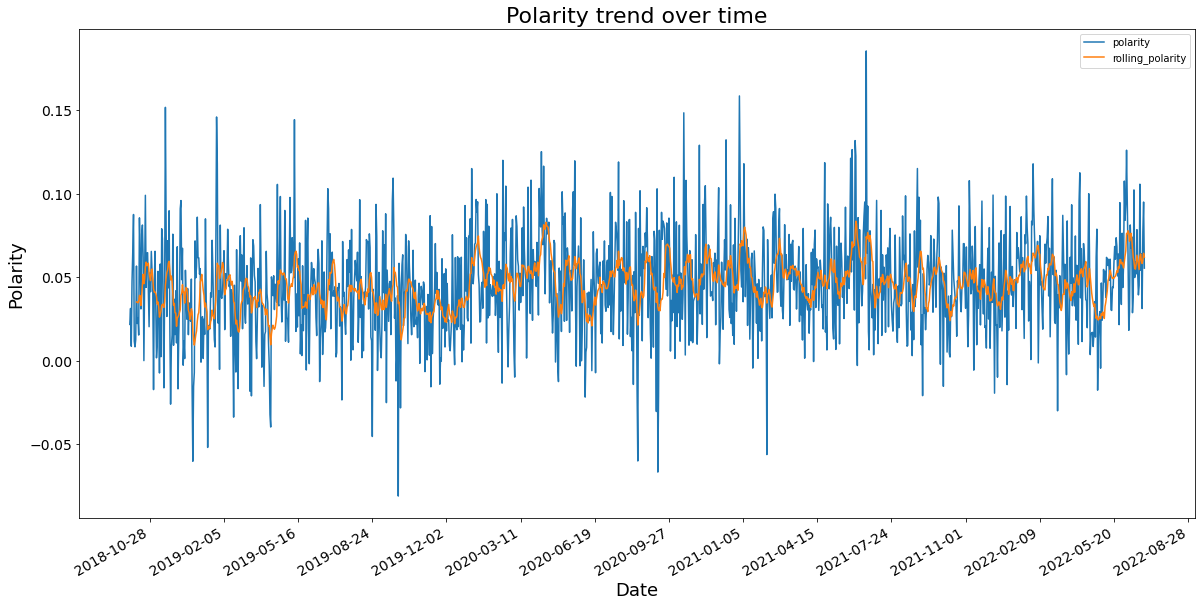

In [13]:
df = articles[["date", "polarity"]].groupby("date").mean().reset_index()
df['rolling_polarity'] = df.polarity.rolling(window=10).mean()
ax = df.plot(x="date", 
        y=["polarity", "rolling_polarity"], 
        figsize=(20, 10), 
        fontsize=14)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.xlabel("Date", fontsize=18)
plt.ylabel("Polarity", fontsize=18)
plt.title("Polarity trend over time", fontsize=22)
#plt.show()
plt.savefig("../Plots/Polarity_plot.pdf", height = 6, width = 8)


In [3]:
df_polarity = pd.read_csv("../Data/Articles_data/polarity.csv")
df_polarity = df_polarity.drop(columns = ["Unnamed: 0"])
df_texts = pd.read_csv("../Data/full_daily_frequencies.csv")
df_texts = df_texts.drop(columns = ["Unnamed: 0"])

In [17]:
df_polarity

,date,polarity
0,2018-10-01,0.021694
1,2018-10-02,0.031256
2,2018-10-03,0.008618
3,2018-10-04,0.047457
4,2018-10-05,0.065333
...,...,...
1362,2022-06-26,0.064019
1363,2022-06-27,0.031210
1364,2022-06-28,0.077016
1365,2022-06-29,0.094997


In [9]:
df_texts = df_texts.rename(columns={'df_chunks_cut': 'date'})

In [10]:
df_texts

,date,Freq
0,2018-10-25,530
1,2018-10-26,896
2,2018-10-27,833
3,2018-10-28,895
4,2018-10-29,913
...,...,...
1316,2022-06-02,5185
1317,2022-06-03,5188
1318,2022-06-04,4966
1319,2022-06-05,7652


In [18]:
df_plot = pd.merge(df_texts, df_polarity, how='left')
df_plot["date"] = pd.to_datetime(df_plot["date"])
df_plot

,date,Freq,polarity
0,2018-10-25,530,0.064641
1,2018-10-26,896,0.043212
2,2018-10-27,833,0.020318
3,2018-10-28,895,0.052485
4,2018-10-29,913,0.041287
...,...,...,...
1316,2022-06-02,5185,0.057400
1317,2022-06-03,5188,0.107568
1318,2022-06-04,4966,0.084063
1319,2022-06-05,7652,0.093839


In [12]:
df_plot.date.unique()

array(['2018-10-25', '2018-10-26', '2018-10-27', ..., '2022-06-04',
       '2022-06-05', '2022-06-06'], dtype=object)

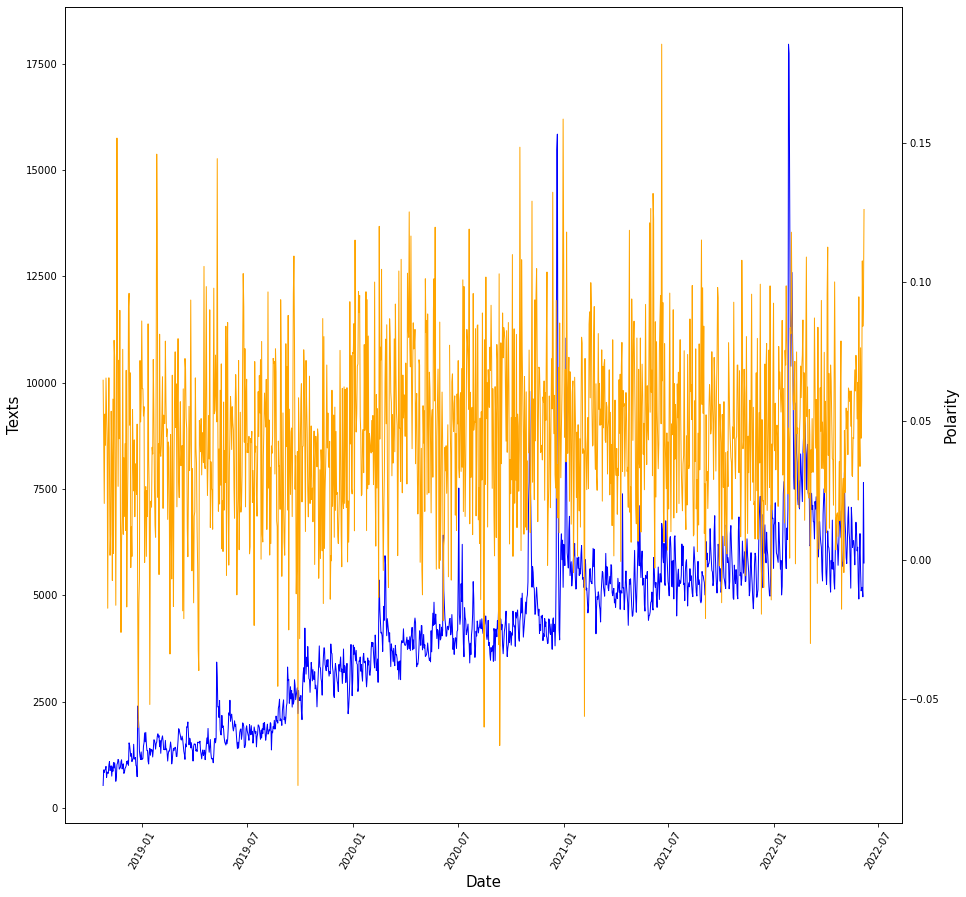

In [20]:
fig, ax = plt.subplots(figsize=[15, 15])

# Plotting the firts line with ax axes
ax.plot(df_plot['date'],
        df_plot['Freq'],
        color='b', linewidth=1)
plt.xticks(rotation=60)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=100))
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Texts', fontsize=15)

# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(df_plot['date'],
         df_plot['polarity'],
         color='orange', linewidth=1)

ax2.set_ylabel('Polarity', fontsize=15)

plt.savefig("../Plots/Polarity_texts_plot.pdf")